In [105]:
# Import modules

import pandas as pd
import numpy as np
import seaborn as sns


In [106]:
# Load the dataset

df = pd.read_json(r'J:\Movies dataset\movies_dataset.json')


In [107]:
# Check the dataframe shape

df.shape

(5043, 14)

In [108]:
# Check the data dypes of the columns

df.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

In [109]:
# Select a column

df['budget']

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040         1400.0
5041            NaN
5042         1100.0
Name: budget, Length: 5043, dtype: float64

In [110]:
# Data preparation
# Remove some columns. Axis = 1 to drop columns, axis = 0 to drop labels from the index. Inplace = True for directly modified original object

df.drop(axis = 1, columns = ["movie_imdb_link", "num_critic_for_reviews"], inplace = True)
df


,color,director_name,duration,gross,genres,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,87.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,English,Canada,NaN,2013.0,7.7
5039,Color,NaN,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,English,USA,NaN,NaN,7.5
5040,Color,Benjamin Roberds,76.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,English,USA,1400.0,2013.0,6.3
5041,Color,Daniel Hsia,100.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,English,USA,NaN,2012.0,6.3


In [21]:
# Check the dataframe shape again

df.shape

(5043, 12)

In [93]:
# Convert the datatype of title_year column to integer using astype method and replace with this new columns

df.title_year = df.title_year.astype('Int64')


In [30]:
# Rename some columns. At first create a dictionary. The key value - the name of the columsn that I want to rename

rename_dict = {"gross" : "movie_income", "budget" : "movie_budget"}
df.rename(columns = rename_dict, inplace = True)
df.head(3)

,color,director_name,duration,movie_income,genres,star_name,movie_title,language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Text(0.5, 1.0, 'Movie Duration Histogram')

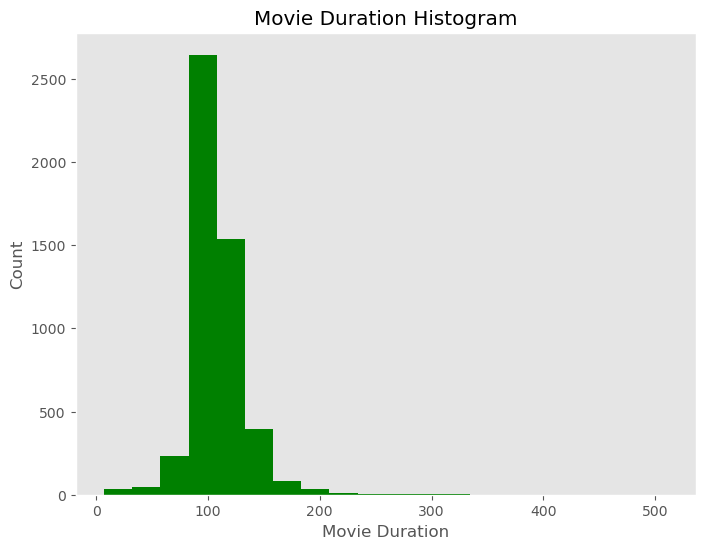

In [36]:
# Data Analysis
# Check the distribution of duration column using a histogram. X-axis represents all of the posible values in the duration column. Y-axis represents the number of times each value was appeared. The histogram shows that around 3000 movies has a duration time between 90 and 100 minutes

ax = df.duration.hist(bins = 20, figsize = (8,6), grid = False, color = "green")
ax.set_xlabel("Movie Duration")
ax.set_ylabel("Count")
ax.set_title("Movie Duration Histogram")


Text(0.5, 1.0, 'IMDb Score Histogram')

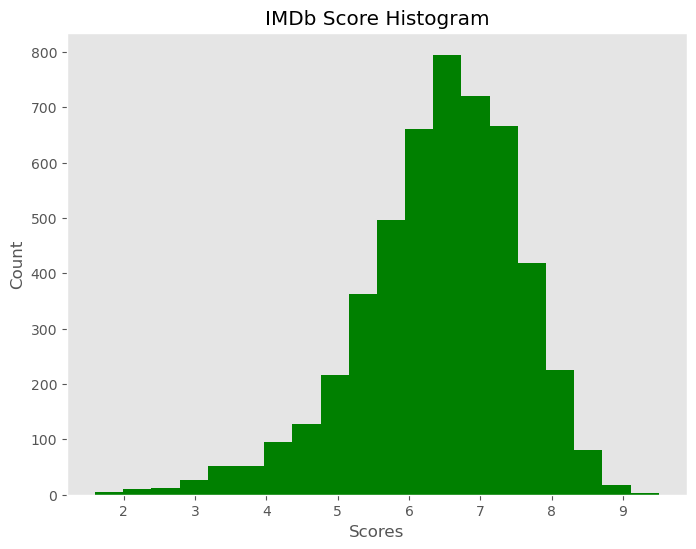

In [46]:
ax = df.imdb_score.hist(bins = 20, figsize =(8,6), grid = False, color = "green")
ax.set_xlabel("Scores")
ax.set_ylabel("Count")
ax.set_title("IMDb Score Histogram")

In [43]:
# Check how many movies have the imdb_score less than 3

df.imdb_score < 3
low_score_movies = df[df.imdb_score < 3]
low_score_movies.shape

# 41 movies have the imdb_score less than 3

(41, 12)

<AxesSubplot:>

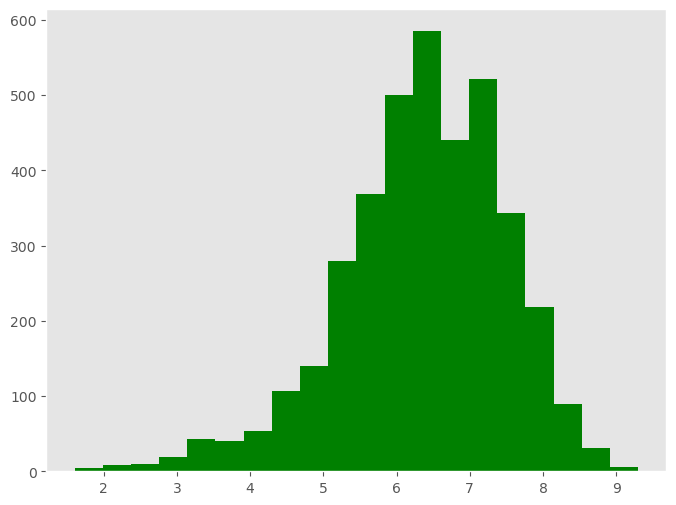

In [45]:
# One way to visualize the distribution of IMDb scores of movies produced in the USA is to create a histogram

df[df.country == "USA"].imdb_score.hist(bins = 20, figsize =(8,6), grid = False, color = "green")

<AxesSubplot:>

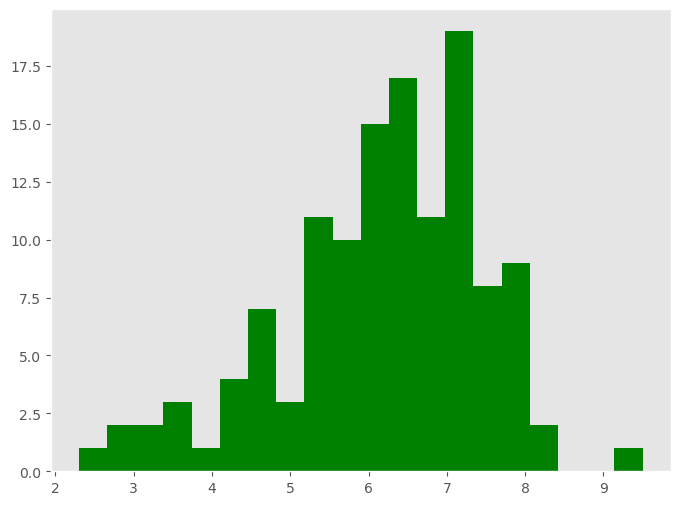

In [47]:
# One way to visualize the distribution of IMDb scores of movies produced in the Canada is to create a histogram

df[df.country == "Canada"].imdb_score.hist(bins = 20, figsize =(8,6), grid = False, color = "green")

<AxesSubplot:>

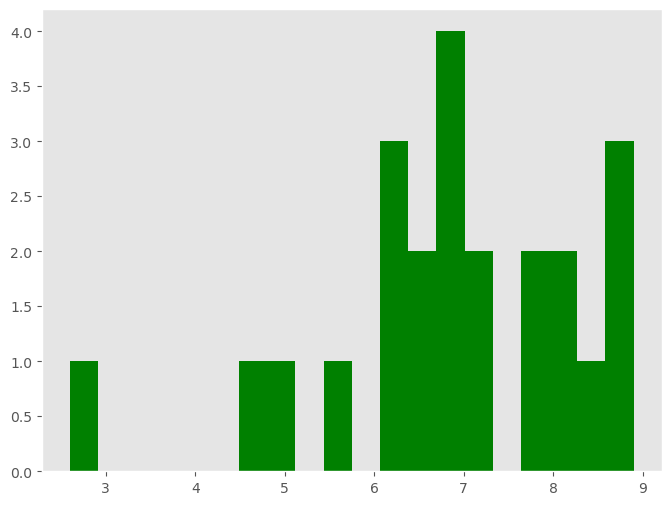

In [48]:
# One way to visualize the distribution of IMDb scores of movies produced in the Italy is to create a histogram

df[df.country == "Italy"].imdb_score.hist(bins = 20, figsize =(8,6), grid = False, color = "green")

In [51]:
# When looking at trends in movie production, it's worth asking which years saw the most and fewest films released. Knowing this can help us understand the evolution of the film industry over time. So, which years had the most and least movies?

# So, I need to determine the number of movies produced each year

number_per_year = df.groupby("title_year").size()
number_per_year

title_year
1916      1
1920      1
1925      1
1927      1
1929      2
       ... 
2012    221
2013    237
2014    252
2015    226
2016    106
Length: 91, dtype: int64

Text(0, 0.5, 'Number of Movies')

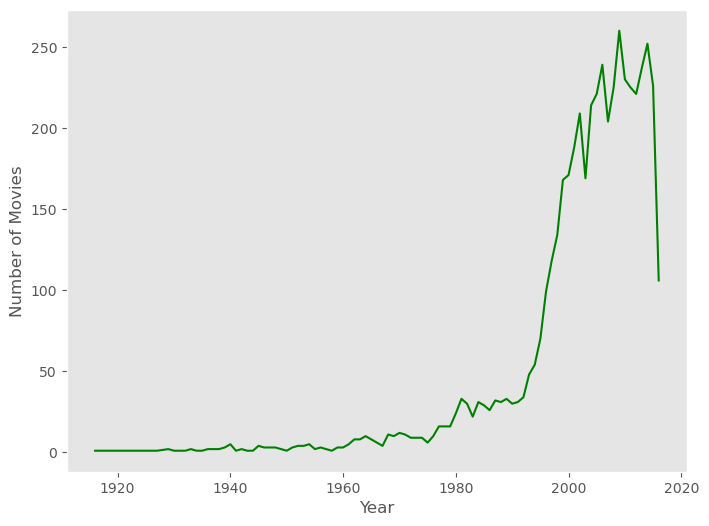

In [55]:
# To visualize this information, I will create a line chart

ax = number_per_year.plot(figsize =(8,6), grid = False, color = "green")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Movies")

In [59]:
# Another important question to answer: during what year was the lowest and highest average movie_budget recorded?

avg_budget = df.groupby("title_year")["movie_budget"].mean()
avg_budget

title_year
1916    3.859070e+05
1920    1.000000e+05
1925    2.450000e+05
1927    6.000000e+06
1929    3.790000e+05
            ...     
2012    4.114327e+07
2013    4.033438e+07
2014    3.532580e+07
2015    3.829978e+07
2016    5.664274e+07
Name: movie_budget, Length: 91, dtype: float64

Text(0.5, 0, 'Year')

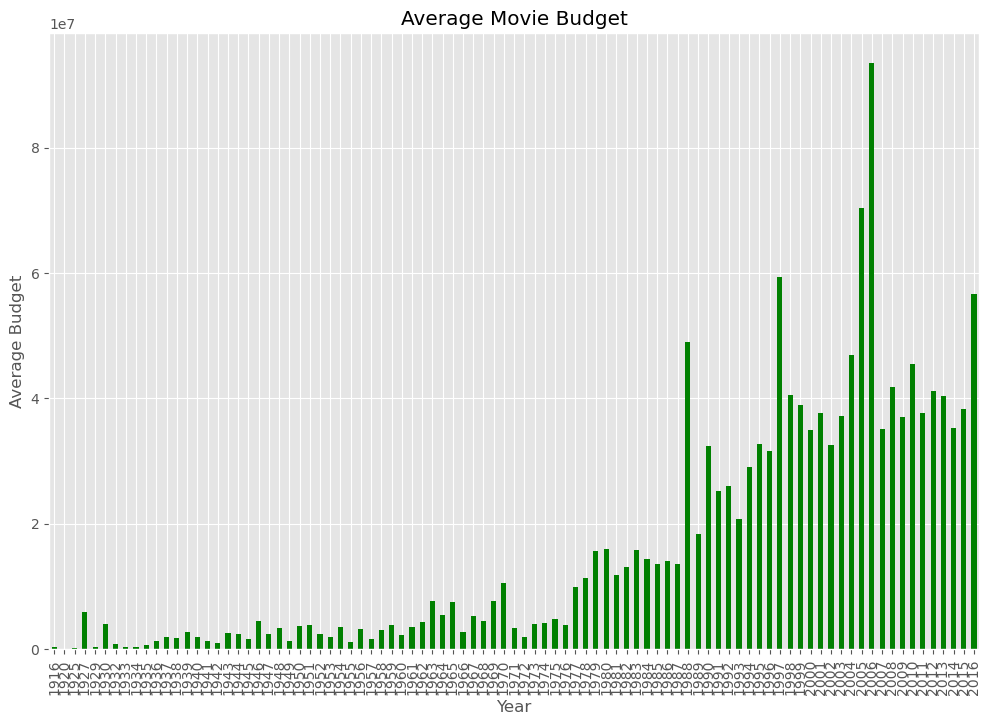

In [68]:
ax = avg_budget.plot.bar(color = "green")
ax.set_title("Average Movie Budget")
ax.set_ylabel("Average Budget")
ax.set_xlabel("Year")

In [69]:
# What remains to be explored is whether is a connection between a movie's IMDb score and its revenue
# I will use correlation analysis

df_cor = df[["imdb_score", "movie_income"]]
df_cor



,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,7.1,NaN
...,...,...
5038,7.7,NaN
5039,7.5,NaN
5040,6.3,NaN
5041,6.3,10443.0


In [70]:
# The dataset consists of NaN values, so I need to drop the rows with NaN values off

df_cor.dropna()


,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
5,6.6,73058679.0
...,...,...
5034,6.3,70071.0
5035,6.9,2040920.0
5037,6.4,4584.0
5041,6.3,10443.0


<AxesSubplot:xlabel='imdb_score', ylabel='movie_income'>

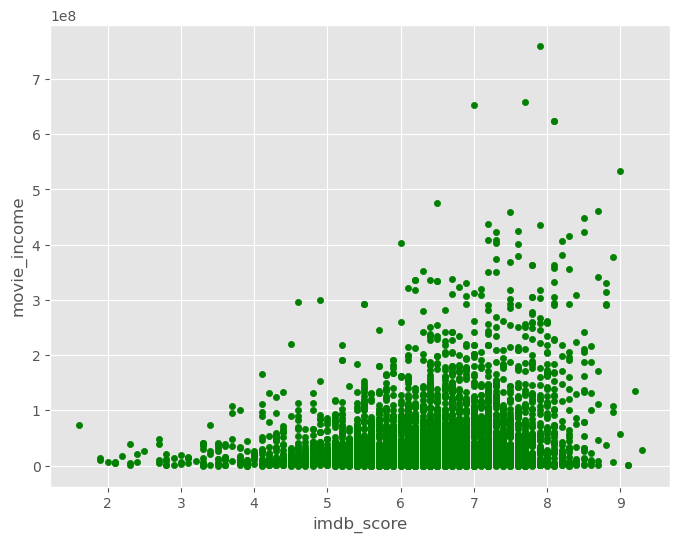

In [82]:
# There were 5043 rows in the dataset, and there is 4159 rows in the dataset now
# A scatter plot can be created to visualize the data

df_cor.plot.scatter(y = "movie_income", x = "imdb_score", figsize =(8,6), color = "green")

In [72]:
# A correlation matrix can be created to check the correlation coefficient

df_cor.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000


In [73]:
# The correlation coefficient 0-0.19 is regarded as very weak. So, there is a very small relationship between movie_income and imdb_score variables

<AxesSubplot:xlabel='movie_title'>

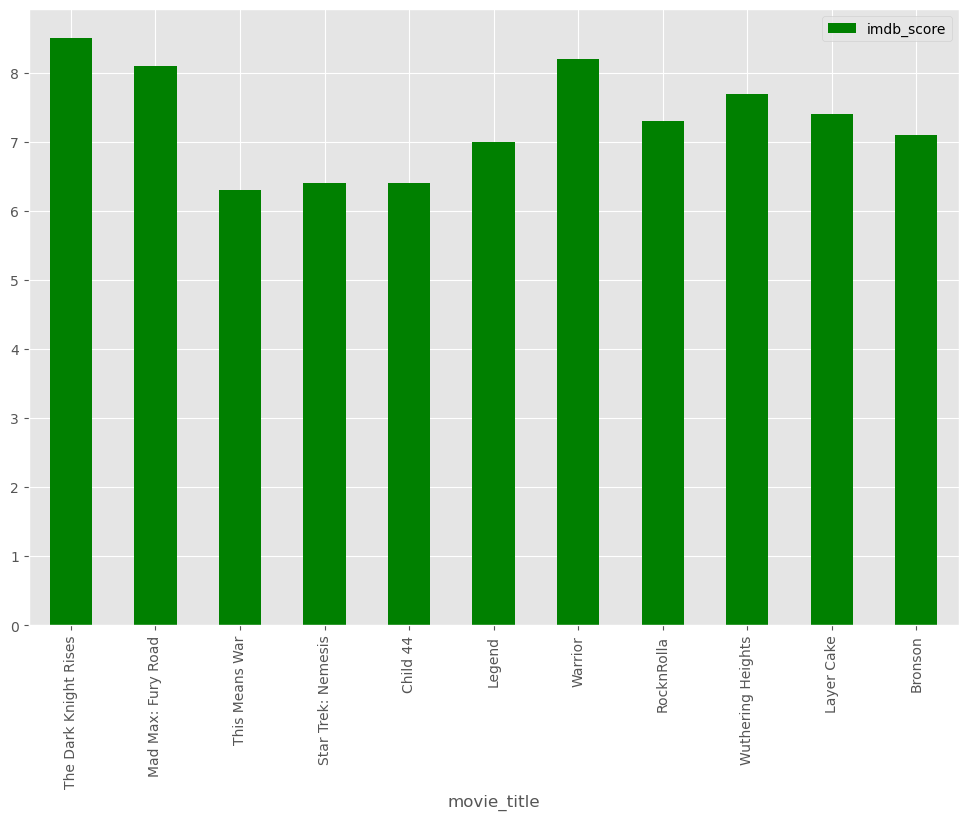

In [83]:
# Let's find out the highest rated movies on IMDb that feature Tom Hardy as the lead actor

df[df.star_name == "Tom Hardy"].plot.bar(x = "movie_title", y = "imdb_score", color = "green")

<AxesSubplot:xlabel='title_year'>

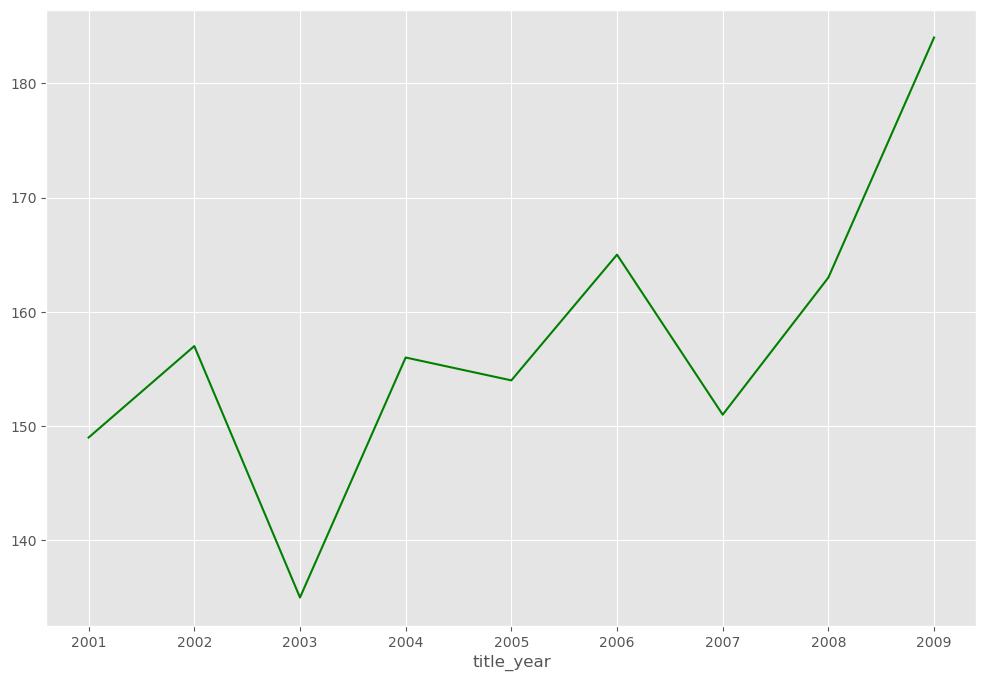

In [89]:
# How many movies have been produced in the USA from 2000 to 2010

df[(df.country == "USA") & (df.title_year > 2000) & (df.title_year < 2010)].groupby("title_year").size().plot(color = "green")

<AxesSubplot:xlabel='title_year'>

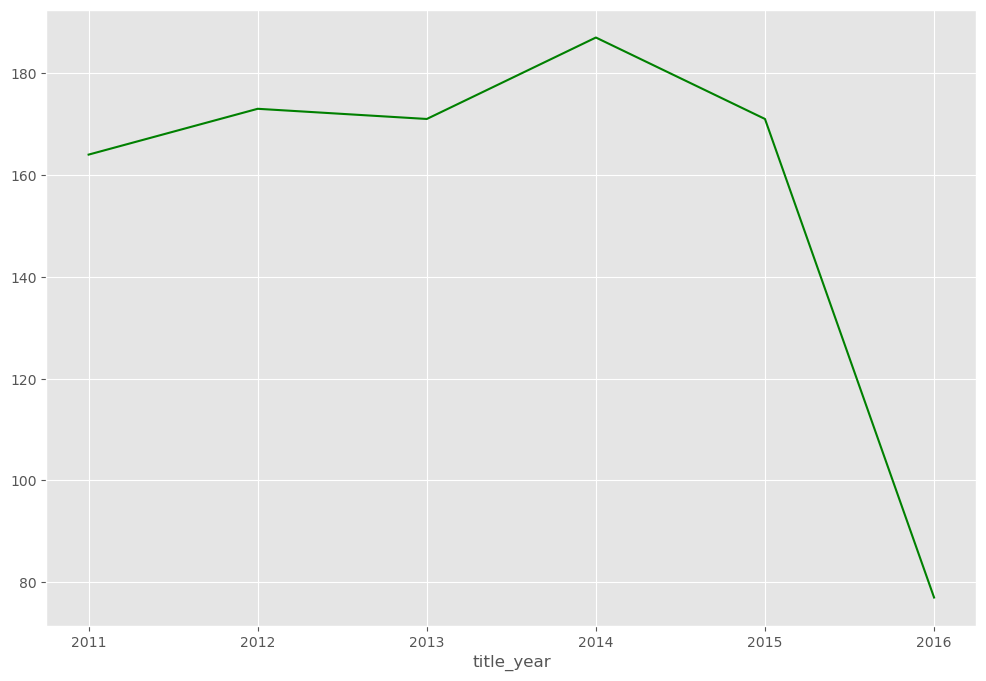

In [92]:
# How many movies have been produced in the USA from 2010 to 2016

df[(df.country == "USA") & (df.title_year > 2010) & (df.title_year < 201)].groupby("title_year").size().plot(color = "green")